In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
print(os.listdir("../input"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
# Loading dataset
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Check for any null values in train dataset
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

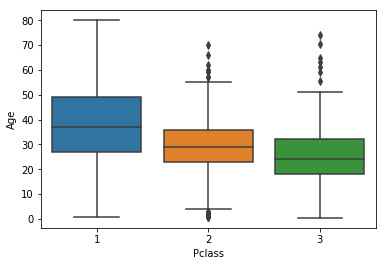

In [7]:
sns.boxplot(x= 'Pclass', y='Age', data= train)

In [8]:
#Adding values for null values
train["Age"].fillna(train["Age"].mean(), inplace=True)
train['Embarked'] = train['Embarked'].fillna('C')

In [9]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

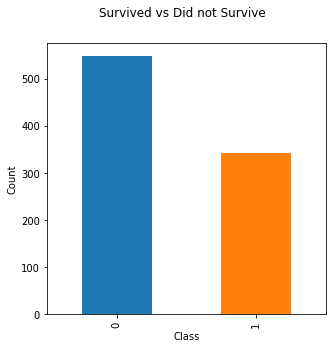

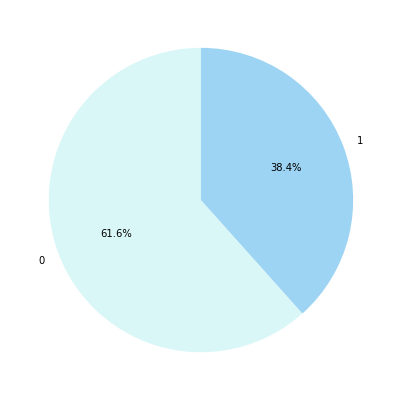

In [11]:
# Survived vs Didn't Survived
plt.figure(figsize = (5,5))

plt.suptitle('Survived vs Did not Survive')
plt.xlabel('Class')
plt.ylabel('Count')
train['Survived'].value_counts().plot.bar()


# Pie chart of passengers who survived vs didn't
plt.figure(figsize = (10,10))
survived_data = train['Survived'].value_counts()
count = survived_data.values
survive = survived_data.index

labels = survive.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

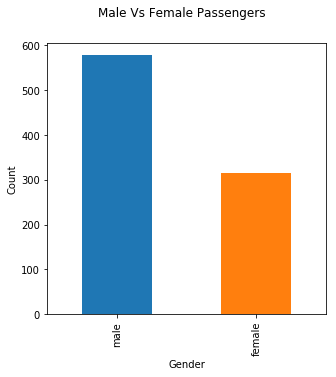

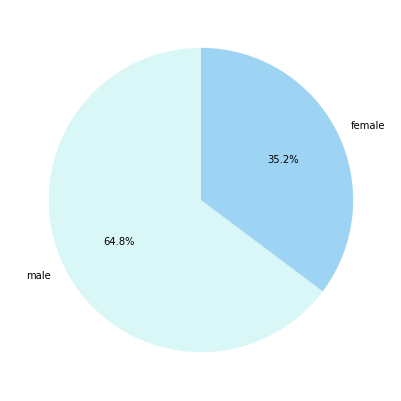

In [12]:
# Male vs Female
plt.figure(figsize = (5,5))

plt.suptitle('Male Vs Female Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
train['Sex'].value_counts().plot.bar()

# Pie chart of Male vs Female Passengers
plt.figure(figsize = (10,10))

gender_data = train['Sex'].value_counts()
count = gender_data.values
gender = gender_data.index

labels = gender.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(11.594234664351859, 0.5, 'density')

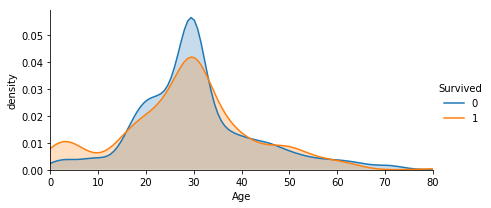

In [13]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density')

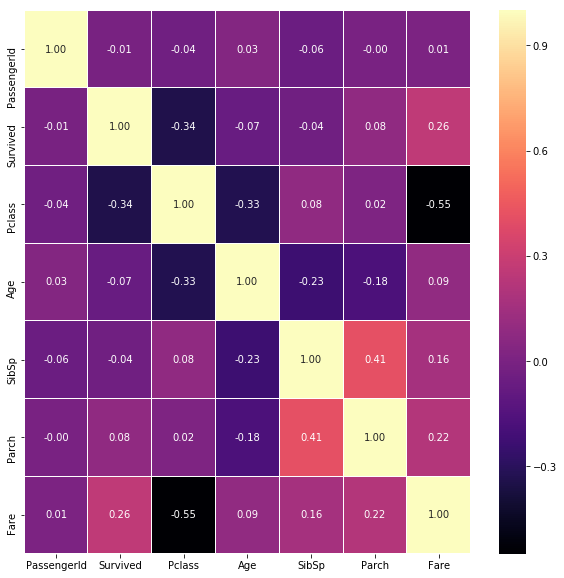

In [14]:
#Correlation between all features
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [15]:
#train.index = train.PassengerId

# Dropping unnecessary columns
train = train.drop(['Name', 'Ticket'], axis = 1)
test = test.drop(['Name', 'Ticket'], axis = 1)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


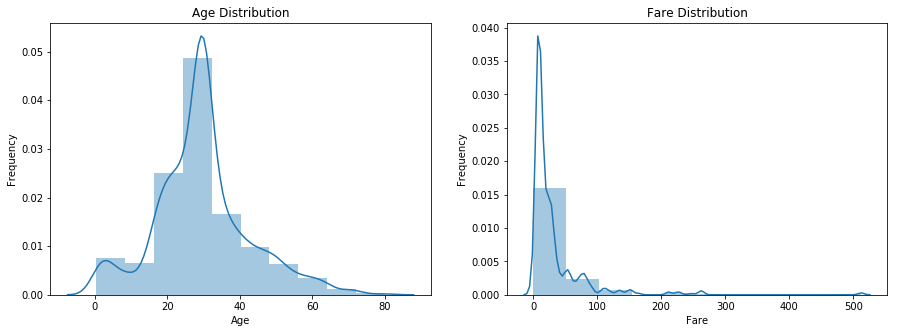

In [18]:
# Viewing the frequency of certain ages and fares
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.distplot(train['Age'], bins = 10, kde = True)

plt.subplot(1,2,2)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
sns.distplot(train['Fare'], bins = 10, kde = True)

Text(0.5, 1.0, 'Survival by sex')

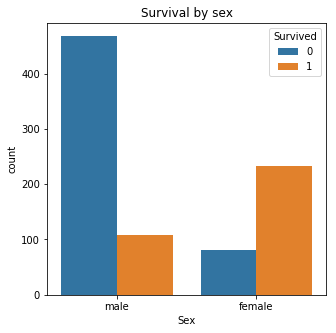

In [19]:
# Survival by gender
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', hue='Survived', data = train)
plt.title('Survival by sex')

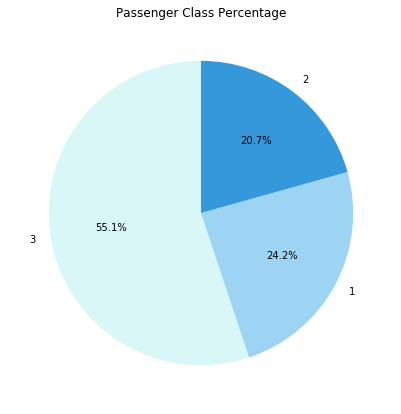

In [20]:
# Passenger class distribution
pclass_data = train['Pclass'].value_counts()
count = pclass_data.values
pclass = pclass_data.index

labels = pclass.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3', '#3498DB']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
plt.title('Passenger Class Percentage')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

<Figure size 1080x1080 with 0 Axes>

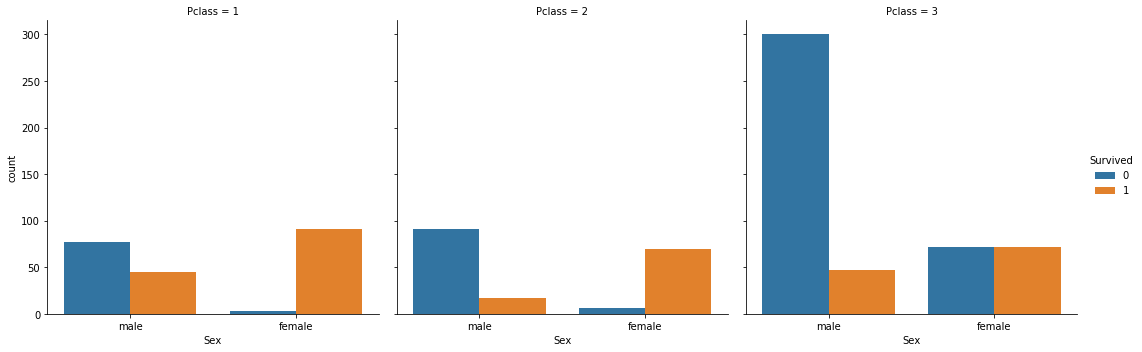

In [21]:
# Survival by gender and Passenger Class
plt.figure(figsize = (15,15))
sns.catplot(x = 'Sex', col='Pclass', hue = 'Survived', kind = 'count' , data = train)

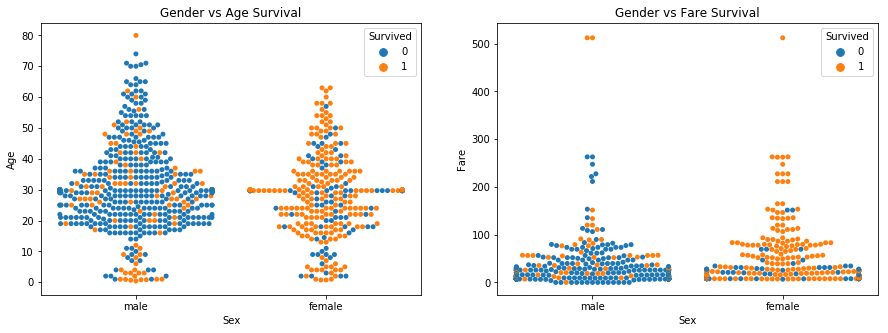

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Gender vs Age Survival')
sns.swarmplot(x="Sex", y="Age", data=train, hue="Survived");
plt.subplot(1,2,2)
plt.title('Gender vs Fare Survival')
sns.swarmplot(x='Sex', y="Fare", data= train, hue = 'Survived')

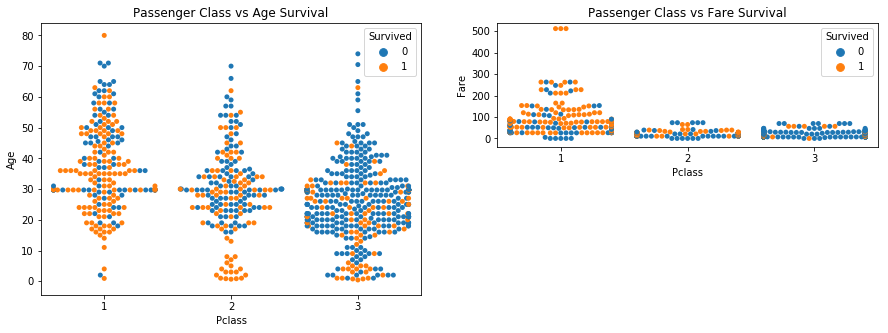

In [23]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Passenger Class vs Age Survival')
sns.swarmplot(x="Pclass", y="Age", data=train, hue="Survived");
plt.subplot(2,2,2)
plt.title('Passenger Class vs Fare Survival')
sns.swarmplot(x='Pclass', y="Fare", data= train, hue = 'Survived')

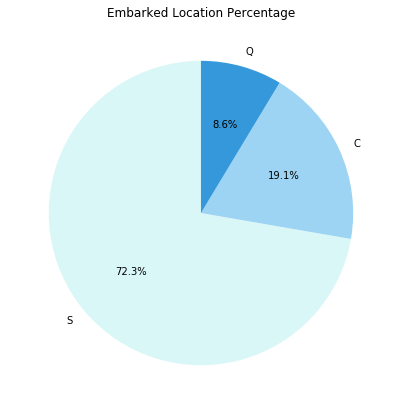

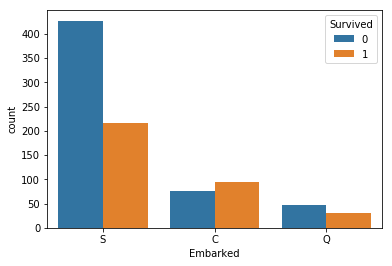

In [24]:
# Embarked location distribution
embark_data = train['Embarked'].value_counts()
count = embark_data.values
embark = embark_data.index

labels = embark.tolist()
size = count 

colors = ['#daf7f8', '#9ed4f3', '#3498DB']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.plot()
plt.title('Embarked Location Percentage')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

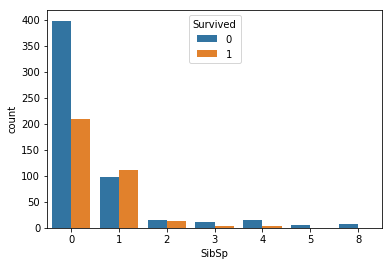

In [25]:
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')

<Figure size 1080x1080 with 0 Axes>

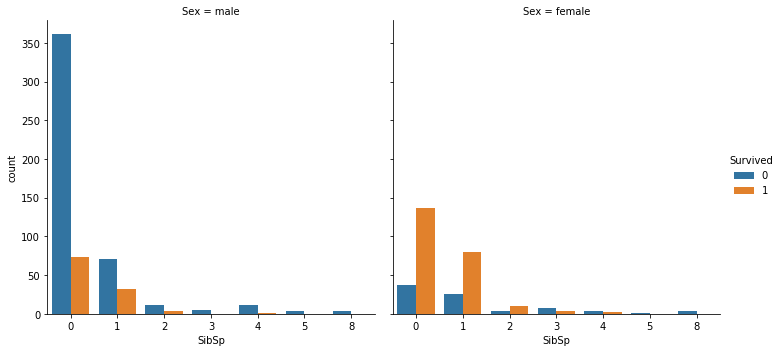

In [26]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = train)

In [27]:
# Sibling survival for different passenger classes
pclass1 = train[train['Pclass'] == 1]
pclass2 = train[train['Pclass'] == 2]
pclass3 = train[train['Pclass'] == 3]

Text(0.5, 0.98, 'Passenger Class 3')

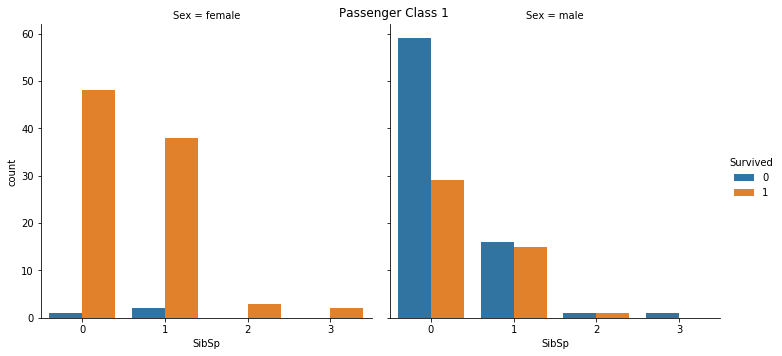

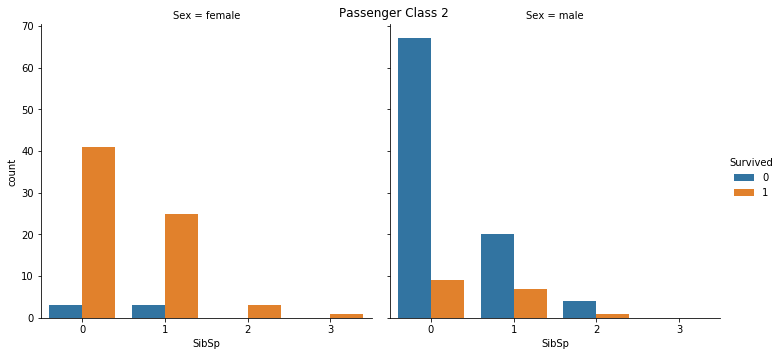

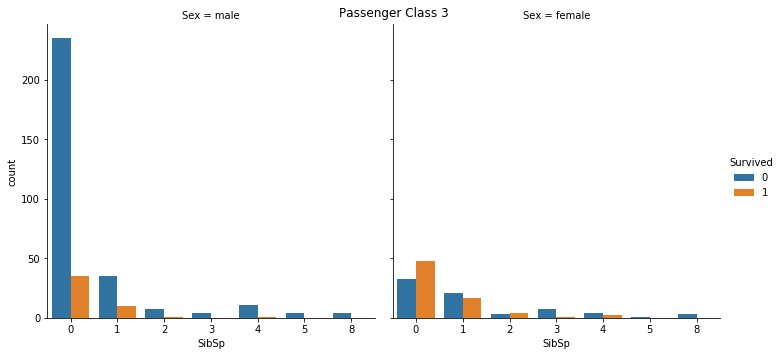

In [28]:
class_1 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass1)
class_1.fig.suptitle('Passenger Class 1')
class_2 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass2)
class_2.fig.suptitle('Passenger Class 2')
class_3 = sns.catplot(x = 'SibSp', col='Sex', hue = 'Survived', kind = 'count' , data = pclass3)
class_3.fig.suptitle('Passenger Class 3')

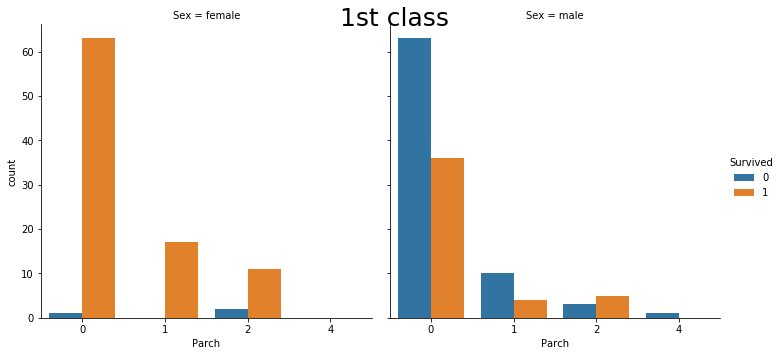

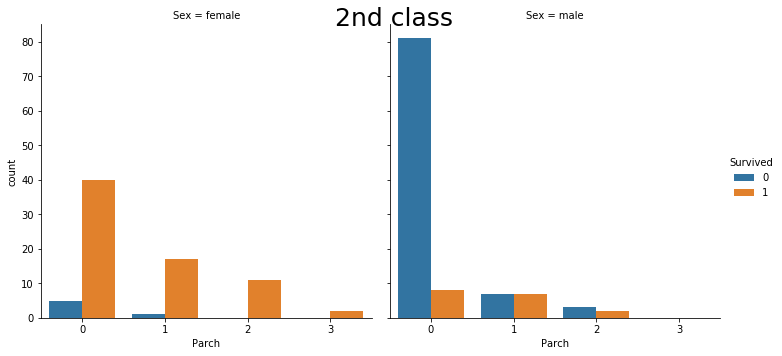

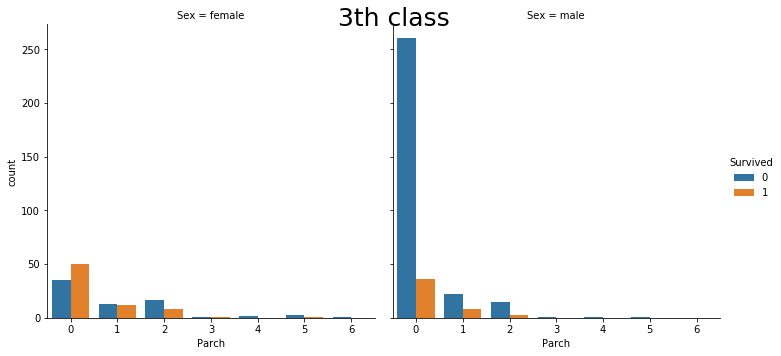

In [29]:
# Family Sizes
parch_1=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass1, kind='count')
parch_1.fig.suptitle('1st class', fontsize=25)
plt.show()
parch_2=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass2, kind='count')
parch_2.fig.suptitle('2nd class', fontsize=25)
plt.show()
parch_3=sns.catplot(x='Parch', hue='Survived', col='Sex', data=pclass3, kind='count', col_order=['female', 'male'])
parch_3.fig.suptitle('3th class', fontsize=25)
plt.show()

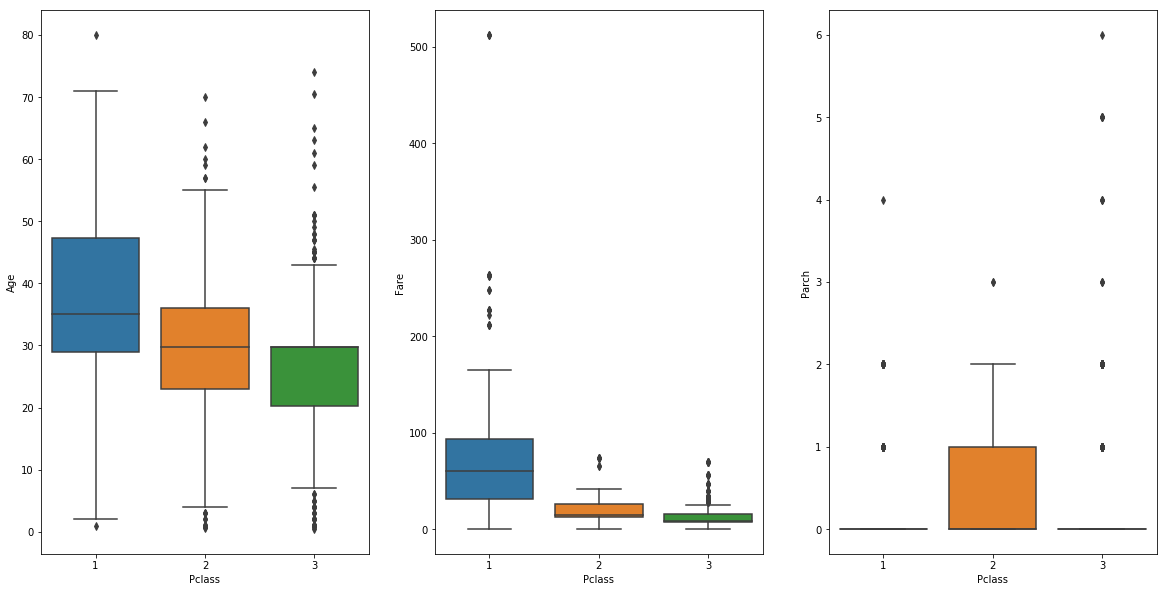

In [30]:
# Boxplots of Age, Fare , and family sizes
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,10))

sns.boxplot(x= 'Pclass', y='Age', data= train, ax = axes[0])
sns.boxplot(x= 'Pclass', y='Fare', data= train, ax = axes[1])
sns.boxplot(x= 'Pclass', y='Parch', data= train, ax = axes[2])


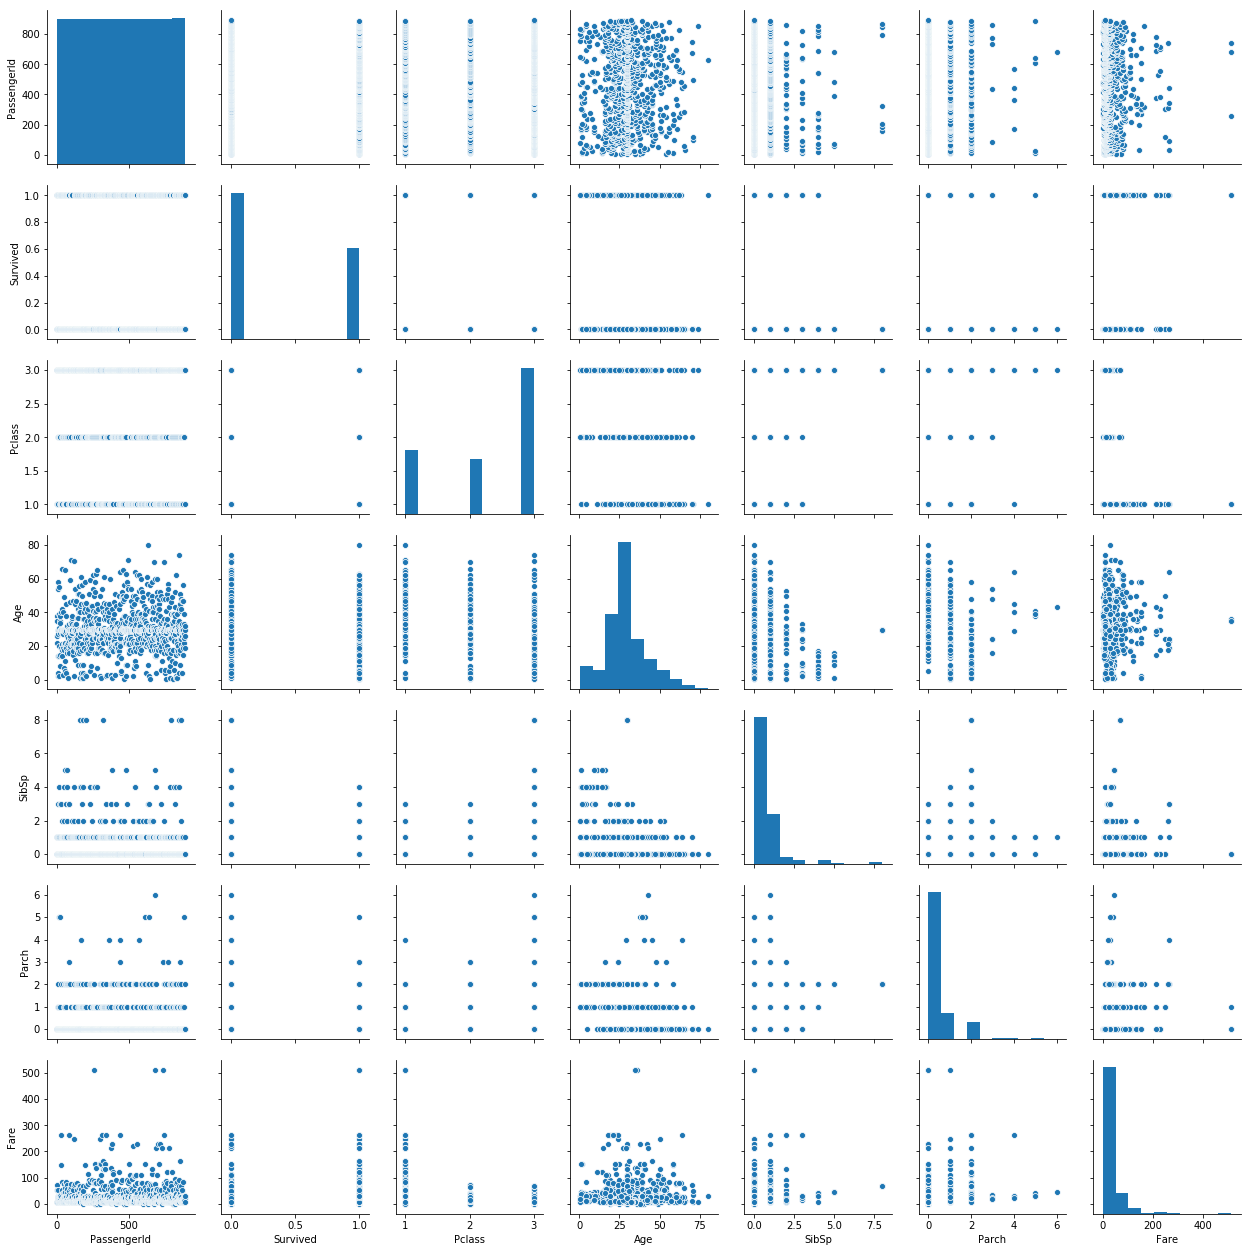

In [31]:
sns.pairplot(train)

In [32]:
# Convert categorical features
gender_conv_train = pd.get_dummies(train['Sex'],drop_first=True)
gender_conv_test = pd.get_dummies(test['Sex'], drop_first = True)

train.drop(['Sex','Embarked'],axis=1,inplace=True)
test.drop(['Sex','Embarked'],axis=1,inplace=True)

train = pd.concat([train,gender_conv_train],axis=1)
test  = pd.concat([test,gender_conv_test],axis=1)


In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,1,0,3,22.0,1,0,7.2500,NaN,1
1,2,1,1,38.0,1,0,71.2833,C85,0
2,3,1,3,26.0,0,0,7.9250,NaN,0
3,4,1,1,35.0,1,0,53.1000,C123,0
4,5,0,3,35.0,0,0,8.0500,NaN,1


In [34]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,892,3,34.5,0,0,7.8292,NaN,1
1,893,3,47.0,1,0,7.0000,NaN,0
2,894,2,62.0,0,0,9.6875,NaN,1
3,895,3,27.0,0,0,8.6625,NaN,1
4,896,3,22.0,1,1,12.2875,NaN,0


In [35]:
# Split data into training and testing sets
X_train = train.drop(['Survived', 'PassengerId', 'Cabin'], axis = 1)
y_train = train['Survived']
X_test = test.drop(['PassengerId', 'Cabin'], axis = 1)

In [36]:
X_test = test.drop(['PassengerId', 'Cabin'], axis = 1)

In [37]:
# Logistic Model
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression().fit(X_train, y_train)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10, max_depth = 5).fit(X_train, y_train)

In [ ]:
# Coefficients from Logistic Regression
# coef = pd.DataFrame(clf.coef_[0], X_train.columns)
# coef.columns = ['Coefficient']
# coef

In [38]:
X_test.isnull().any()

Pclass    False
Age        True
SibSp     False
Parch     False
Fare       True
male      False
dtype: bool

In [39]:
X_test["Age"].fillna(X_test["Age"].mean(), inplace= True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace = True)

In [42]:
# This is for downloading the csv file in the kaggle kernel for submission
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "prediction.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
prediction = model.predict(X_test)

predict_df = pd.DataFrame(prediction, test['PassengerId'])
predict_df.columns = ['Survived']
predict_df.to_csv("predictions.csv")

# create a link to download the dataframe
create_download_link(predict_df)